In [1]:
import pandas as pd
train = pd.read_csv("C:/Users/joyle/Desktop/chingi/人工智慧/TA-class/Sentiment Analysis on Movie Reviews/train.tsv", sep='\t')
test = pd.read_csv("C:/Users/joyle/Desktop/chingi/人工智慧/TA-class/Sentiment Analysis on Movie Reviews/test.tsv", sep='\t')

In [30]:
train_phrase = train['Phrase']   #將需要讀取的內容提取出來
train = pd.get_dummies(train,columns=[ "Sentiment" ])
y_train = train.iloc[:,3:8]
y_train

,Sentiment_0,Sentiment_1,Sentiment_2,Sentiment_3,Sentiment_4
0,0,1,0,0,0
1,0,0,1,0,0
2,0,0,1,0,0
3,0,0,1,0,0
4,0,0,1,0,0
5,0,0,1,0,0
6,0,0,1,0,0
7,0,0,1,0,0
8,0,0,1,0,0
9,0,0,1,0,0


In [3]:
train = pd.get_dummies(train,columns=[ "Sentiment" ])
train

,PhraseId,SentenceId,Phrase,Sentiment_0,Sentiment_1,Sentiment_2,Sentiment_3,Sentiment_4
0,1,1,A series of escapades demonstrating the adage ...,0,1,0,0,0
1,2,1,A series of escapades demonstrating the adage ...,0,0,1,0,0
2,3,1,A series,0,0,1,0,0
3,4,1,A,0,0,1,0,0
4,5,1,series,0,0,1,0,0
5,6,1,of escapades demonstrating the adage that what...,0,0,1,0,0
6,7,1,of,0,0,1,0,0
7,8,1,escapades demonstrating the adage that what is...,0,0,1,0,0
8,9,1,escapades,0,0,1,0,0
9,10,1,demonstrating the adage that what is good for ...,0,0,1,0,0


In [31]:
from keras.datasets import imdb
from keras.preprocessing import sequence        #用於資料預處理
from keras.preprocessing.text import Tokenizer 
token = Tokenizer(num_words=20000)  #使用Tokenizer建立token，20000字的字典
token.fit_on_texts(train_phrase)     #讀取所有訓練資料
#print(token.document_count)   #讀取多少文章
#print(token.word_index)       #查看字典index

In [32]:
#將每一篇文章的文字轉換一連串的數字，只有在字典中的文字會轉換為數字
x_train_seq = token.texts_to_sequences(train_phrase)
#print(len(train_phrase[0]))     #查看轉換前的影評文字
#print(len(x_train_seq[0]))     #查看轉換後的對應數字 

In [33]:
x_train = sequence.pad_sequences(x_train_seq, maxlen=30)
#x_train

In [70]:
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation,Flatten
from keras.layers.embeddings import Embedding
from keras.layers.recurrent import LSTM


model = Sequential()
model.add(Embedding(output_dim=32,input_dim=20000, input_length=30))
model.add(Dropout(0.5))

model.add(LSTM(32))

model.add(Dense(units=256,activation='relu' ))
model.add(Dropout(0.5))

model.add(Dense(units=5,activation='sigmoid' ))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

train_history =model.fit(x_train, y_train,batch_size=300, epochs=35 ,verbose=2 ,validation_split=0.2)

loss, accuracy = model.evaluate(x_train, y_train)
print( "\nLoss: %.2f, Accuracy: %.2f%%" % (loss, accuracy* 100 ))

Train on 124848 samples, validate on 31212 samples
Epoch 1/35
 - 18s - loss: 0.3970 - acc: 0.8354 - val_loss: 0.3750 - val_acc: 0.8430
Epoch 2/35
 - 18s - loss: 0.3457 - acc: 0.8552 - val_loss: 0.3543 - val_acc: 0.8447
Epoch 3/35
 - 19s - loss: 0.3064 - acc: 0.8634 - val_loss: 0.3399 - val_acc: 0.8493
Epoch 4/35
 - 19s - loss: 0.2856 - acc: 0.8712 - val_loss: 0.3347 - val_acc: 0.8503
Epoch 5/35
 - 19s - loss: 0.2758 - acc: 0.8754 - val_loss: 0.3358 - val_acc: 0.8504
Epoch 6/35
 - 20s - loss: 0.2686 - acc: 0.8788 - val_loss: 0.3347 - val_acc: 0.8498
Epoch 7/35
 - 19s - loss: 0.2624 - acc: 0.8817 - val_loss: 0.3373 - val_acc: 0.8507
Epoch 8/35
 - 19s - loss: 0.2579 - acc: 0.8835 - val_loss: 0.3406 - val_acc: 0.8498
Epoch 9/35
 - 20s - loss: 0.2538 - acc: 0.8851 - val_loss: 0.3446 - val_acc: 0.8503
Epoch 10/35
 - 19s - loss: 0.2505 - acc: 0.8869 - val_loss: 0.3406 - val_acc: 0.8495
Epoch 11/35
 - 19s - loss: 0.2475 - acc: 0.8878 - val_loss: 0.3430 - val_acc: 0.8499
Epoch 12/35
 - 19s - lo

In [71]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_8 (Embedding)      (None, 30, 32)            640000    
_________________________________________________________________
dropout_15 (Dropout)         (None, 30, 32)            0         
_________________________________________________________________
lstm_8 (LSTM)                (None, 32)                8320      
_________________________________________________________________
dense_15 (Dense)             (None, 256)               8448      
_________________________________________________________________
dropout_16 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_16 (Dense)             (None, 5)                 1285      
Total params: 658,053
Trainable params: 658,053
Non-trainable params: 0
_________________________________________________________________


In [72]:
import matplotlib.pyplot as plt
def show_train_history(train_history,train,validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

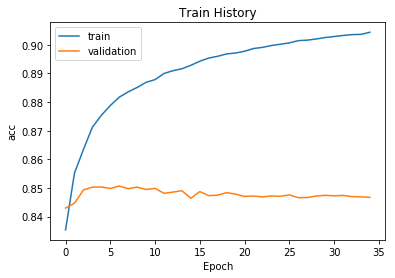

In [73]:
show_train_history(train_history,'acc','val_acc')

In [74]:
#test
test_phrase=test['Phrase']   #將需要讀取的內容提取出來
x_test_seq = token.texts_to_sequences(test_phrase)
x_test = sequence.pad_sequences(x_test_seq, maxlen=30)

y_test = model.predict_classes(x_test)
y_test = pd.DataFrame(y_test,columns=['Sentiment'])

In [75]:
#將id提出來
y_PhraseId = test.iloc[:,0]


#將id與type組合
df=pd.concat([y_PhraseId,y_test],axis=1)

In [76]:
#將dataframe儲存為csv檔
df.to_csv('sampleSubmission.csv',index=False,header = True)